In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [2]:
def read_world_bank_data(filename):
    # Read the World Bank data into a DataFrame
    df = pd.read_csv(filename)

    # Transpose the DataFrame
    df_transposed = df.T

    # Extract the header row to use as column names
    new_columns = df_transposed.iloc[0]

    # Set the new column names and remove the old header row
    df_transposed.columns = new_columns
    df_transposed = df_transposed[1:]

    # Separate the DataFrame into two based on data types
    df_years = df_transposed[df_transposed.index.str.isnumeric()]
    df_countries = df_transposed[~df_transposed.index.str.isnumeric()]
    df_transposed = df.pivot_table(index=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode']
                                   , columns='Year', values='Value').reset_index()

    # Clean up the DataFrames
    df_years.index = df_years.index.astype(int)
    df_years.index.name = 'Year'
    df_countries.columns.name = 'Country'

    return df_years, df_countries

# Example usage:
filename = 'WDIData_T.csv'
df_years, df_countries = read_world_bank_data(filename)

print("\nDataFrame with Countries as Columns:")
df_countries.head()



DataFrame with Countries as Columns:


Country,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,Arab World,...,"Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep.","Congo, Rep."
CountryCode,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,ARB,...,COG,COG,COG,COG,COG,COG,COG,COG,COG,COG
IndicatorName,"Adolescent fertility rate (births per 1,000 wo...",Age dependency ratio (% of working-age populat...,"Age dependency ratio, old (% of working-age po...","Age dependency ratio, young (% of working-age ...",Aquaculture production (metric tons),Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Birth rate, crude (per 1,000 people)",Broad money (% of GDP),Capture fisheries production (metric tons),...,Merchandise imports by the reporting economy (...,"Merchandise imports by the reporting economy, ...",Merchandise imports from economies in the Arab...,Merchandise imports from high-income economies...,Merchandise imports from low- and middle-incom...,Merchandise imports from low- and middle-incom...,Merchandise imports from low- and middle-incom...,Merchandise imports from low- and middle-incom...,Merchandise imports from low- and middle-incom...,Merchandise imports from low- and middle-incom...
IndicatorCode,SP.ADO.TFRT,SP.POP.DPND,SP.POP.DPND.OL,SP.POP.DPND.YG,ER.FSH.AQUA.MT,MS.MIL.XPRT.KD,MS.MIL.MPRT.KD,SP.DYN.CBRT.IN,FM.LBL.BMNY.GD.ZS,ER.FSH.CAPT.MT,...,TM.VAL.MRCH.WL.CD,TM.VAL.MRCH.RS.ZS,TM.VAL.MRCH.AL.ZS,TM.VAL.MRCH.HI.ZS,TM.VAL.MRCH.R1.ZS,TM.VAL.MRCH.R2.ZS,TM.VAL.MRCH.R3.ZS,TM.VAL.MRCH.R4.ZS,TM.VAL.MRCH.R5.ZS,TM.VAL.MRCH.R6.ZS
Year,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960,...,1977,1977,1977,1977,1977,1977,1977,1977,1977,1977
Value,134.772341,88.06111,6.591951,81.324186,4600.0,3000000.0,541000000.0,47.790076,22.07371,474880.0,...,183204000.0,3.403856,0.564944,88.195127,1.621689,0.223248,0.961224,0.555665,0.06168,4.977511


In [3]:
df = pd.read_csv('WDIData_T.csv')
df_transposed = df.pivot_table(
    index=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
    columns='Year',
    values='Value'
).reset_index()
print('Dataframe with years as columns')
df_transposed.head()

Dataframe with years as columns


Year,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963,1964,1965,...,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977
0,Afghanistan,AFG,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.682221e+01,NaN,NaN,NaN
1,Afghanistan,AFG,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.472420e+00,NaN,NaN,NaN
2,Afghanistan,AFG,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.456145e+01,NaN,NaN,NaN
3,Afghanistan,AFG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.672569e+09,1.751841e+09,1.532448e+09,1.661035e+09,2.059579e+09,2.247748e+09,2.422622e+09,2.797341e+09
4,Afghanistan,AFG,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.496888e+02,1.526600e+02,1.299652e+02,1.371740e+02,1.659218e+02,1.771392e+02,1.871749e+02,2.123815e+02


In [4]:
# List of countries to filter
df = pd.read_csv('WDIData_T.csv')
countries_to_filter = ['India', 'Afghanistan',
                       'Argentina',
                       'Europe & Central Asia',
                       'Malaysia', 'Greece',
                       'Poland']

indicators_to_filter = [
    'GDP (current US$)',
    'Merchandise exports by the reporting economy (current US$)',
    'Mortality rate, adult, male (per 1,000 male adults)',
    'Mortality rate, adult, female (per 1,000 female adults)',
    'Energy imports, net (% of energy use)'
]

# Filter the dataset for the specified countries and indicators
filtered_df = df[(df['CountryName'].isin(countries_to_filter)) &
                 (df['IndicatorName'].isin(indicators_to_filter))]

filtered_df.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1276,Europe & Central Asia,ECS,"Energy imports, net (% of energy use)",EG.IMP.CONS.ZS,1960,3.012341e+01
1286,Europe & Central Asia,ECS,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1960,4.808052e+10
1315,Europe & Central Asia,ECS,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,1.267285e+02
1316,Europe & Central Asia,ECS,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,1960,2.251880e+02
7470,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08


In [5]:
# Create a pivot table with years as columns and countries as rows
df_years = filtered_df.pivot_table(
    index=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
    columns='Year', values='Value').reset_index()

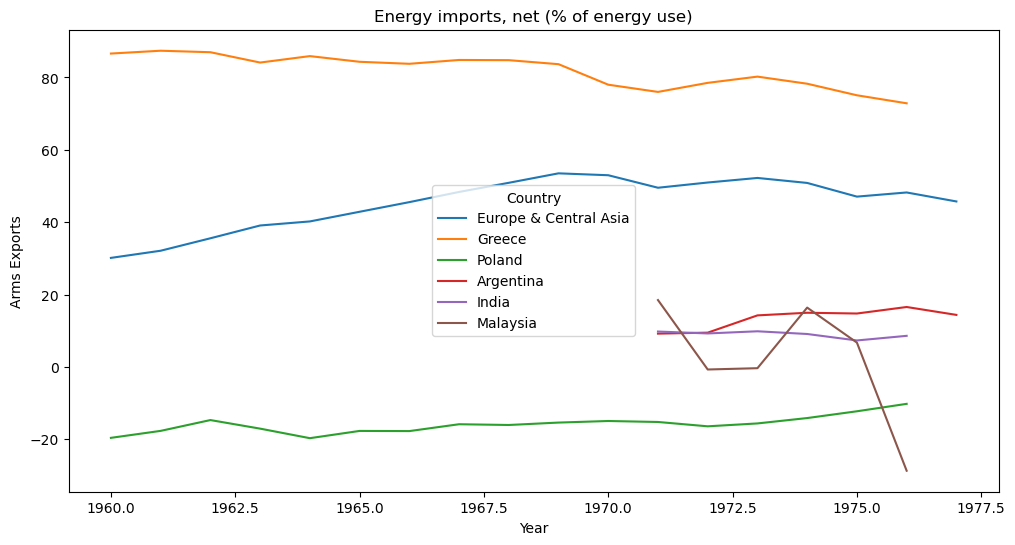

In [7]:
# Line Plot: Energy imports, net (% of energy use) for different countries
x = filtered_df[filtered_df['IndicatorName'] == 'Energy imports, net (% of energy use)']
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Year',
    y='Value',
    hue='CountryName',
    data=x
)
plt.title('Energy imports, net (% of energy use)')
plt.xlabel('Year')
plt.ylabel('Arms Exports')
plt.legend(title='Country')
plt.show()

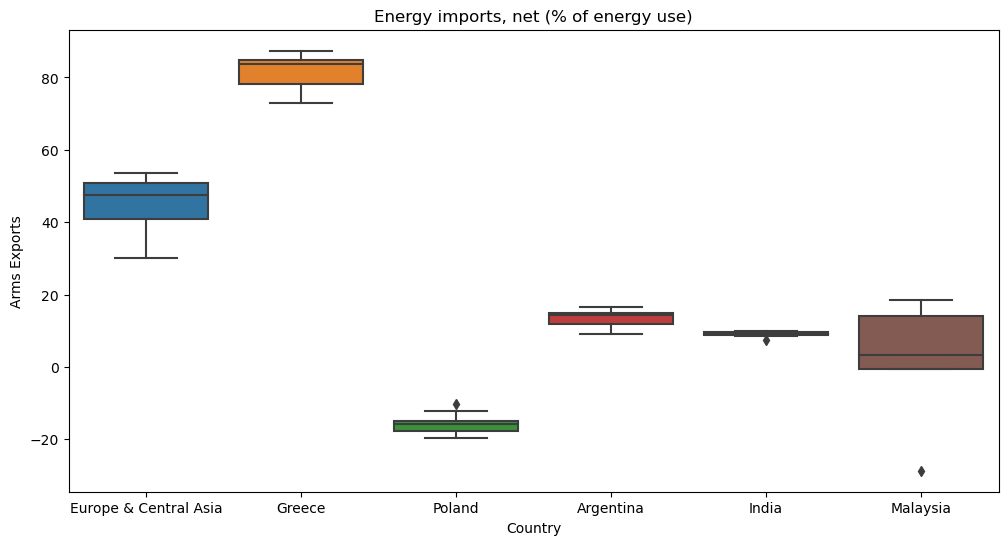

In [8]:
# Box Plot
# Distribution of Energy imports, net (% of energy use) across countries
y = filtered_df[filtered_df['IndicatorName'] == 'Energy imports, net (% of energy use)']
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='CountryName',
    y='Value',
    data=y
)

plt.title('Energy imports, net (% of energy use)')
plt.xlabel('Country')
plt.ylabel('Arms Exports')
plt.show()


In [9]:
filtered_df.describe()

,Year,Value
count,521.000000,5.210000e+02
mean,1968.608445,4.433061e+10
std,5.044442,2.492110e+11
min,1960.000000,-2.871684e+01
25%,1964.000000,1.366290e+02
50%,1969.000000,3.856360e+02
75%,1973.000000,1.772520e+09
max,1977.000000,2.718980e+12


In [10]:
correlation, p_value = pearsonr(
    filtered_df['Year'].astype(float),
    filtered_df['Value'].astype(float))
print(f"\nCorrelation between {'Year'} and {'Value'}: {correlation:.4f}, p-value: {p_value:.4f}")


Correlation between Year and Value: 0.1428, p-value: 0.0011


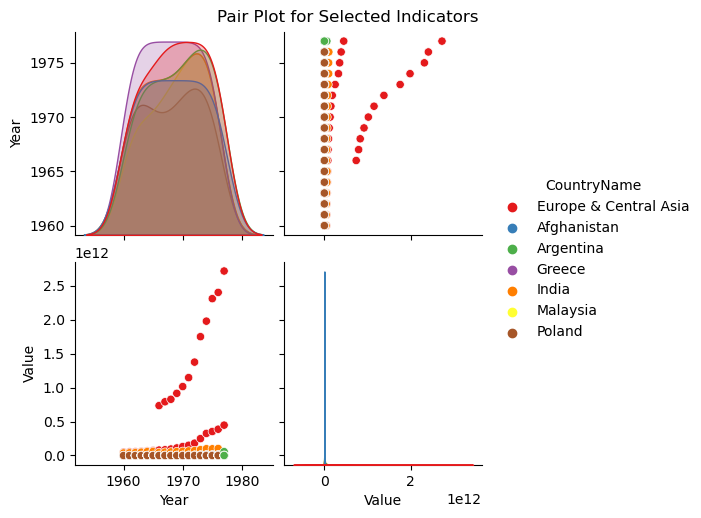

In [11]:
sns.pairplot(filtered_df, hue='CountryName', markers='o', palette='Set1')
plt.suptitle('Pair Plot for Selected Indicators', y=1.02)
plt.show()

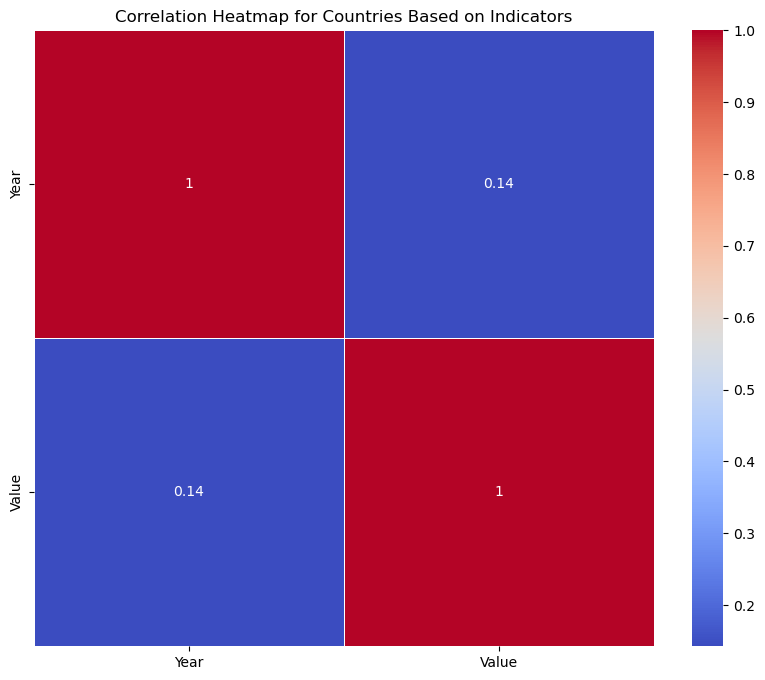

In [10]:

df_countries = pd.DataFrame(filtered_df)

# Set 'CountryName' as the index for correlation calculation
# df_countries.set_index('CountryName', inplace=True)

# Select only numeric columns for correlation calculation
numeric_columns = df_countries.select_dtypes(include='number').columns
correlation_matrix = df_countries[numeric_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Countries Based on Indicators')
plt.show()


In [11]:
# Assuming 'CountryName' is a non-numeric column that you want to exclude
numeric_columns = filtered_df.select_dtypes(include='number').columns

# 1. Calculate correlation between indicators for selected countries
correlation_matrix = filtered_df[numeric_columns].corr()

mean_values = filtered_df[numeric_columns].mean()
std_dev_values = filtered_df[numeric_columns].std()


In [12]:
filtered_df[filtered_df['CountryName'] == 'Greece']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18046,Greece,GRC,"Energy imports, net (% of energy use)",EG.IMP.CONS.ZS,1960,8.661520e+01
18070,Greece,GRC,GDP (current US$),NY.GDP.MKTP.CD,1960,4.335186e+09
18126,Greece,GRC,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1960,2.031000e+08
18154,Greece,GRC,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1960,1.281220e+02
18155,Greece,GRC,"Mortality rate, adult, male (per 1,000 male ad...",SP.DYN.AMRT.MA,1960,2.042300e+02
...,...,...,...,...,...,...
970654,Greece,GRC,"Energy imports, net (% of energy use)",EG.IMP.CONS.ZS,1976,7.286274e+01
970698,Greece,GRC,GDP (current US$),NY.GDP.MKTP.CD,1976,3.115284e+10
970802,Greece,GRC,Merchandise exports by the reporting economy (...,TX.VAL.MRCH.WL.CD,1976,2.552760e+09
970834,Greece,GRC,"Mortality rate, adult, female (per 1,000 femal...",SP.DYN.AMRT.FE,1976,9.669400e+01


In [13]:
numeric_columns = df_years.select_dtypes(include='number').columns

# Calculate the correlation matrix using only numeric columns
df_corr = df_years[numeric_columns].corr()

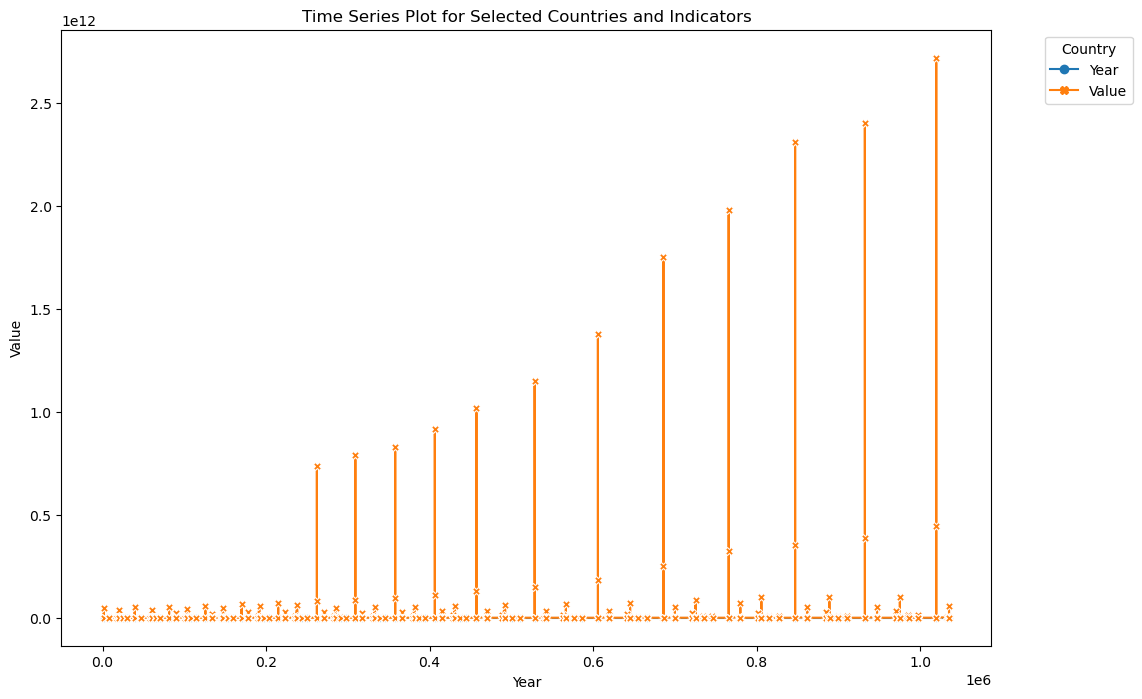

In [14]:
df_countries = pd.DataFrame(filtered_df)
# Set the 'Country Name' column as the index
# df_countries.set_index('CountryName', inplace=True)

# Transpose the dataframe for better visualization
df_countries_transposed = df_countries.transpose()

# Plot time series for each indicator
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_countries, markers=True, dashes=False)
plt.title('Time Series Plot for Selected Countries and Indicators')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


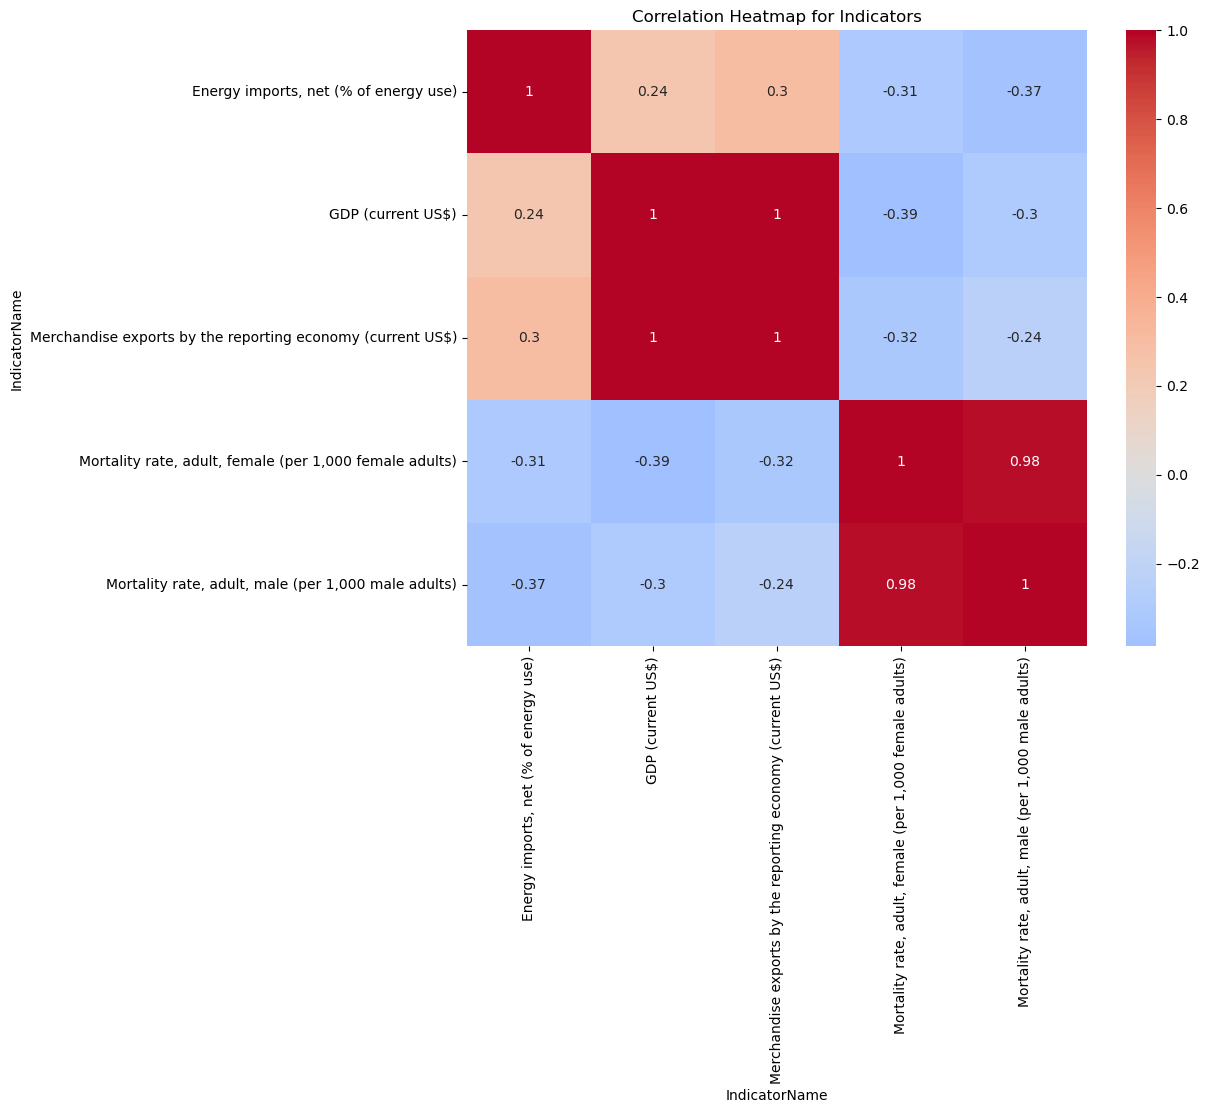

In [15]:
%matplotlib inline


df = pd.DataFrame(filtered_df)

# Pivot the entire DataFrame, not just for a single year
pivot_df = df.pivot_table(
    index='CountryName',
    columns='IndicatorName',
    values='Value',
    aggfunc='mean')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Add title and adjust the position
plt.title('Correlation Heatmap for Indicators')

# Show the plot
plt.show()


In [ ]:
%matplotlib inline


# Assuming 'df' is your DataFrame
# If not, replace it with your DataFrame
df = pd.DataFrame(filtered_df)

# Select a subset of columns for the pair plot
selected_columns = ['CountryName', 'IndicatorName', 'Year', 'Value']
pair_plot_data = df[selected_columns]

# Create a pair plot
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot for Selected Columns', y=1.02)
plt.show()


In [ ]:
%matplotlib inline


# Assuming 'df' is your DataFrame
# If not, replace it with your DataFrame
df = pd.DataFrame(filtered_df)

# Pivot the DataFrame to get average values for each indicator per country
pivot_df = df.pivot_table(
    index='CountryName',
    values='Value',
    columns='IndicatorName',
    aggfunc='mean')

# Select a subset of indicators for the bar plot
selected_indicators = ['Merchandise exports by the reporting economy (current US$)', 'GDP (current US$)']

# Filter the pivot_df to include only selected indicators
pivot_df_subset = pivot_df[selected_indicators]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=pivot_df_subset.mean().index, y=pivot_df_subset.mean().values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Values of Selected Indicators by Country')
plt.xlabel('Indicators')
plt.ylabel('Average Value')
plt.show()


In [ ]:
# column name for skew
data_column = filtered_df['Value'].values

# Calculate skewness and kurtosis
skewness_value = skew(data_column)
kurtosis_value = kurtosis(data_column)

print("Skewness:", skewness_value)
print("Kurtosis:", kurtosis_value)

# Bootstrap for standard deviation as an example
low, high = bootstrap(data_column, np.std, confidence_level=0.682)
sigma = 0.5 * (high - low)

std_dev = np.round(np.std(data_column), 4)
sigma_value = np.round(sigma, 4)

print("Standard Deviation:", std_dev, "+/-", sigma_value)